In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import PIL
import PIL.Image
from matplotlib import rcParams
rcParams['font.family'] = "Palatino"
import svglib

In [15]:
tr_color = [55, 126, 34]
vl_color = [117, 251, 253]
te_color = [0, 0, 245]

In [16]:
random.seed(0)
num_frames = 30
im_width = 40
frames = []
inter_space = np.tile(np.array([255, 255, 255], dtype=np.uint8), reps = im_width).reshape(im_width, 3).repeat(100, axis=0).reshape(100, im_width, 3)
for i in range(num_frames):
    running = []
    for j in range(10):
        pml_train = random.randrange(33, 95)
        pml_val = random.randrange(int((100 - pml_train)*.1), int((100 - pml_train)*.9))
        pml_test = 100 - pml_train - pml_val

        mtx_tr = np.tile(np.array(tr_color, dtype=np.uint8), reps = im_width).reshape(im_width, 3).repeat(pml_train, axis=0).reshape(pml_train, im_width, 3)
        mtx_vl = np.tile(np.array(vl_color, dtype=np.uint8), reps = im_width).reshape(im_width, 3).repeat(pml_val, axis=0).reshape(pml_val, im_width, 3)
        mtx_te = np.tile(np.array(te_color, dtype=np.uint8), reps = im_width).reshape(im_width, 3).repeat(pml_test, axis=0).reshape(pml_test, im_width, 3)
        im_mtx = np.concatenate((mtx_te, mtx_vl, mtx_tr), axis=0)
        running += [im_mtx, inter_space]

    im_mtx = np.concatenate(running[:-1], axis=1)
    frames.append(im_mtx)

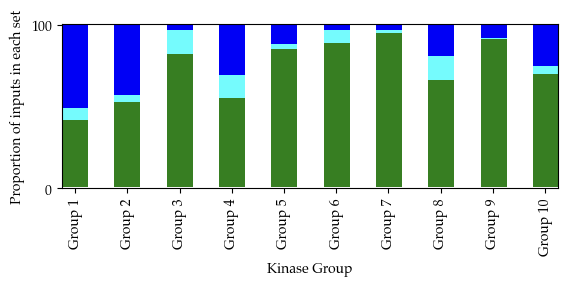

In [19]:
for i in range(len(frames)):
    plt.imshow(frames[i], aspect = 2.5, interpolation='none')
    plt.xlabel("Kinase Group")
    plt.ylabel("Proportion of inputs in each set")
    plt.yticks([0, 100], [100, 0])
    plt.xticks(list(range(20, 800, 80)), ["Group "+ str(x) for x in range(1, 11)], rotation = 90)
    plt.savefig(f"framesV3/frame-{i}.png", dpi = 600)
    

In [20]:
frames = [PIL.Image.open(f"./framesV3/frame-{i}.png") for i in range(len(frames))]

frames[0].save('animV3.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)

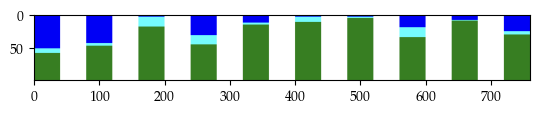

In [127]:
plt.imshow(im_mtx)

In [252]:
random.seed(0)
random.shuffle(colors)
rand_kin_colors = np.array([[random.choice(colors) for _ in range(500)]], np.uint8)
rand_kin_colors = np.repeat(rand_kin_colors, 400, 0)
rand_kin_colors = np.repeat(rand_kin_colors, 50, 1)

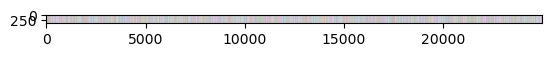

In [253]:
img = Image.fromarray(rand_kin_colors, mode='RGB')
img.save("kin_image.png")
plt.imshow(img)